In [1]:
from dreimac import CircularCoords

from circle_bundles.viz.pca_viz import show_pca
from circle_bundles.viz.thumb_grids import *
from circle_bundles.viz.fiber_vis import *
from circle_bundles.viz.nerve_vis import *
from circle_bundles.viz.base_vis import *
from circle_bundles.viz.lattice_vis import *
from circle_bundles.viz.circle_vis import *
from circle_bundles.bundle import build_bundle, attach_bundle_viz_methods
from circle_bundles.covers import MetricBallCover
from circle_bundles.metrics import RP1_dist2, get_dist_mat
from circle_bundles.local_triv import *
attach_bundle_viz_methods()


from synthetic.tori_and_kb import *
from synthetic.s2_bundles import *

#For saving
folder_path = '/Users/bradturow/Desktop/Diagrams/Paper Diagrams/'

In [ ]:
#Goal:  
#1. Compute a sample from S3, compute adj to get a dataset SO(3) and possibly apply it to mesh vertices
#2. Compute base projections to S2 which are compatible 
#3. Compute characteristic classes and compare results 
#4. Show/compare results by applying rotations to a 3D object
#*4. Fiberwise clustering of O(3)

# Trivial Bundle Over $\mathbb{S}^{2}$

In [ ]:
from circle_bundles.triangle_cover_builders import *
from synthetic.s2_bundles import *
n_samples = 10000
sigma = 0.2
data, base_points, angles = sample_S2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

In [ ]:
#Run Ripser on the dataset
from ripser import ripser
from persim import plot_diagrams
prime = 2
diagrams = ripser(data, coeff = prime, maxdim = 2, n_perm = 500)['dgms']
plot_diagrams(diagrams, show=True)    


In [ ]:
#Show an interactive visualization of the dataset
from circle_bundles.viz.bundle_dash import *

app = show_bundle_vis(base_points = base_points, data  = data)
plt.show()

In [ ]:
#Construct an open cover of RP2
n_sd = 1
s2_cover = make_s2_cover(base_points, n_sd = n_sd)

summ = s2_cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes
bundle = build_bundle(
    data,
    s2_cover,
    CircularCoords_cls=CircularCoords,  
    show=True
)



In [ ]:
#Construct a bundle map
from circle_bundles.bundle_map import *

U = s2_cover.U
pou = s2_cover.pou
f = bundle.local_triv.f
Omega = bundle.classes.cocycle_used.Omega

F, pre_F, Omega_true, Phi_true, report = get_bundle_map(
    U = U,
    pou = pou,
    f = f,
    Omega = Omega,
    edges = None,
    strict_semicircle = True,
    show_summary = True)

In [ ]:
#Run Ripser on the dataset
prime = 2

diagrams = ripser(F, coeff = prime, maxdim = 2, n_perm = 500)['dgms']
plot_diagrams(diagrams, show=True)    


In [ ]:
show_pca(F)

# Spin(3) and SO(3)

In [2]:
n_samples = 5000

s3_data = sample_sphere(n_samples, dim = 3)
base_points = hopf_projection(s3_data)
so3_data = spin3_adjoint_to_so3(s3_data)
base_points2 = so3_to_s2_projection(so3_data)
print(np.allclose(base_points, base_points2))

True


### Cover And Nerve Summary
- $n_\text{sets} = 26$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 26$
- $\#(\text{1-simplices}) = 72$
- $\#(\text{2-simplices}) = 48$
- *No recorded simplices in dimensions* $\ge 3$

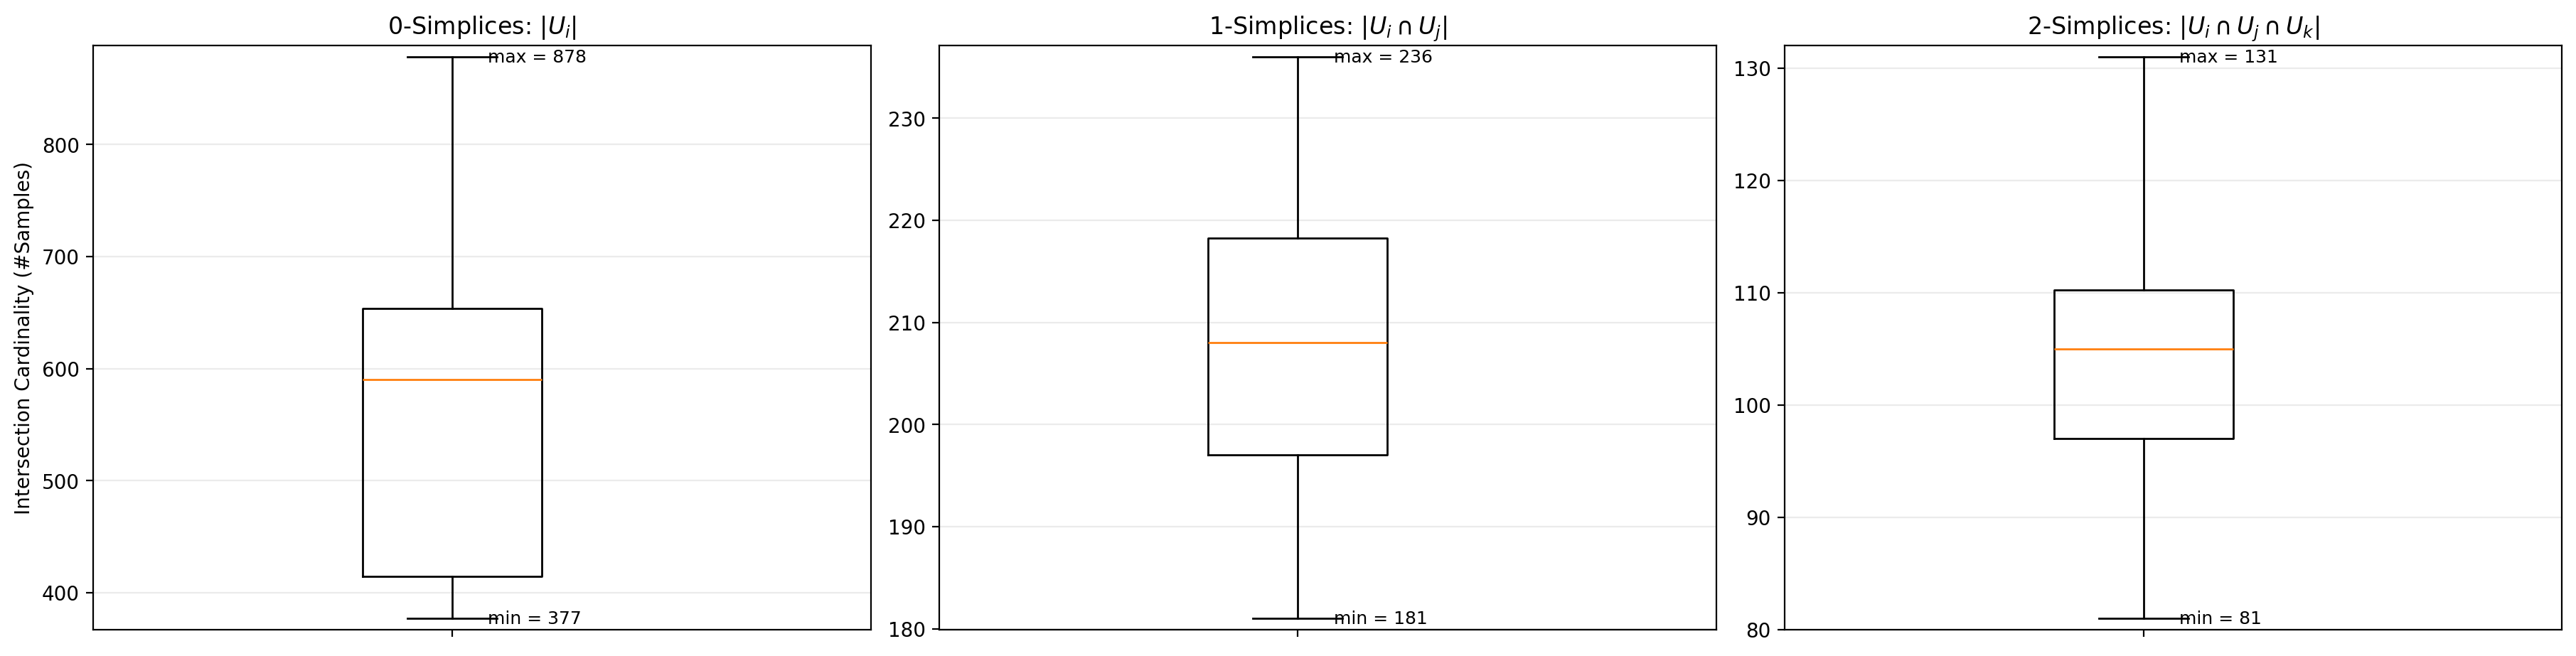

In [3]:
from circle_bundles.triangle_cover_builders import *
from synthetic.s2_bundles import *

#Construct an open cover of RP2
n_sd = 1
s2_cover = make_s2_cover(base_points, n_sd = n_sd)

summ = s2_cover.summarize(plot = True)

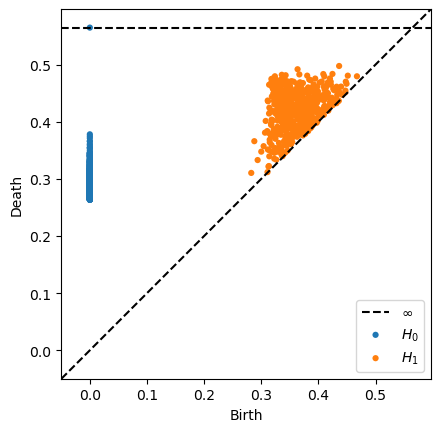

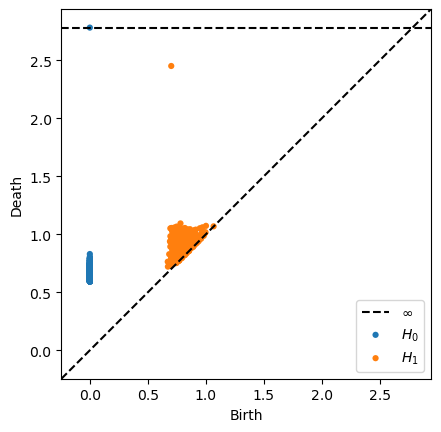

In [4]:
#Run Ripser on the dataset
from ripser import ripser
from persim import plot_diagrams
prime = 2
diagrams = ripser(s3_data, coeff = prime, maxdim = 1, n_perm = 500)['dgms']
plot_diagrams(diagrams, show=True)    

diagrams = ripser(so3_data, coeff = prime, maxdim = 1, n_perm = 500)['dgms']
plot_diagrams(diagrams, show=True)    


In [5]:
#Construct local circular coordinates and model transitions as O(2) matrices
s3_bundle = build_bundle(
    s3_data,
    s2_cover,
    CircularCoords_cls=CircularCoords,
    show=True,
)


<IPython.core.display.Math object>

In [6]:
#Construct local circular coordinates and model transitions as O(2) matrices
so3_bundle = build_bundle(
    so3_data,
    s2_cover,
    CircularCoords_cls=CircularCoords,
    show=True,
)


<IPython.core.display.Math object>

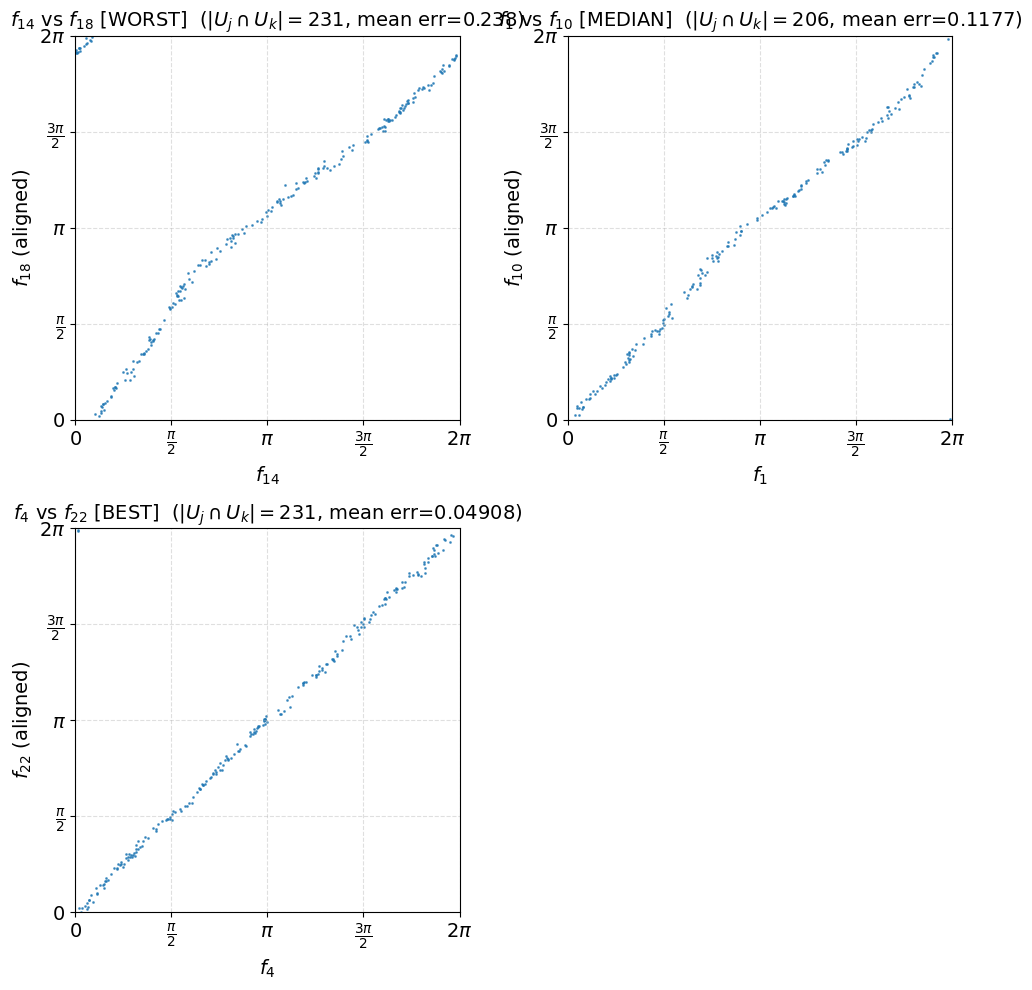

In [8]:
fig = s3_bundle.compare_trivs(align = True)
plt.show()